In [2]:
from google.colab import files
uploaded=files.upload()

Saving heights.csv to heights.csv


In [4]:
import pandas as pd
df=pd.read_csv('heights.csv')
df.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [5]:
import matplotlib.pyplot as plt


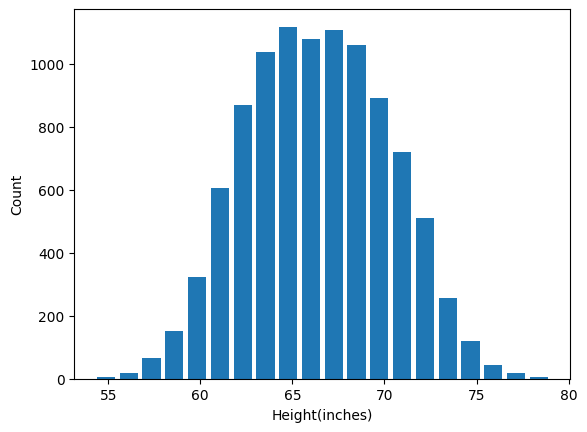

In [8]:
plt.hist(df['height'],bins=20,rwidth=0.8)
plt.xlabel('Height(inches)')
plt.ylabel('Count')
plt.show()

In [13]:
from scipy.stats import norm
import numpy as np

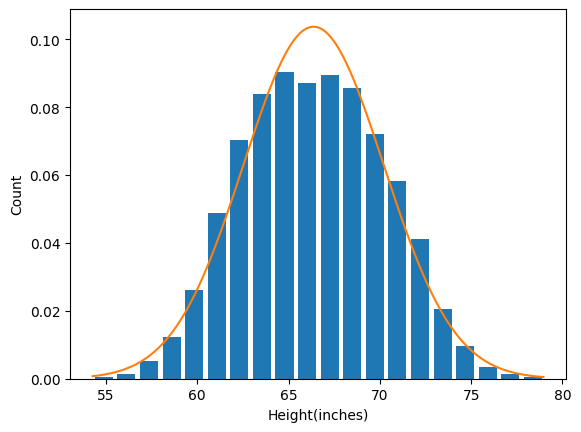

In [19]:
plt.hist(df['height'],bins=20,rwidth=0.8,density=True)
plt.xlabel('Height(inches)')
plt.ylabel('Count')
rng=np.arange(df.height.min(),df.height.max(),0.1)
plt.plot(rng,norm.pdf(rng,df.height.mean(),df.height.std()))

In [20]:
df.height.mean()

66.367559754866

In [21]:
df.height.std()

3.847528120795573

In [22]:
upper_limit=df.height.mean()+3*df.height.std()

In [24]:
upper_limit

77.91014411725271

In [25]:
lower_limit=df.height.mean()-3*df.height.std()
lower_limit

54.824975392479274

In [27]:
df[(df['height']<lower_limit)|(df['height']>upper_limit)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [28]:
#these are outlires

In [29]:
newdf=df[(df['height']>lower_limit)&(df['height']<upper_limit)]

In [30]:
newdf.shape


(9993, 2)

In [31]:
df.shape

(10000, 2)

In [32]:
#we can also use Z score

In [33]:
df['zscore']=(df.height-df.height.mean())/df.height.std()

In [34]:
df.head()

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [36]:
df[(df['zscore']>=3) |(df['zscore']<-3)]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [37]:
newdff=df[(df['zscore']<=3) &(df['zscore']>=-3)]

In [38]:
newdff.shape

(9993, 3)

### **Exercise**

In [39]:
from google.colab import files
uploaded=files.upload()

Saving bhp.csv to bhp.csv


In [40]:
df=pd.read_csv('bhp.csv')
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [42]:
df['price_per_sqft'].describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

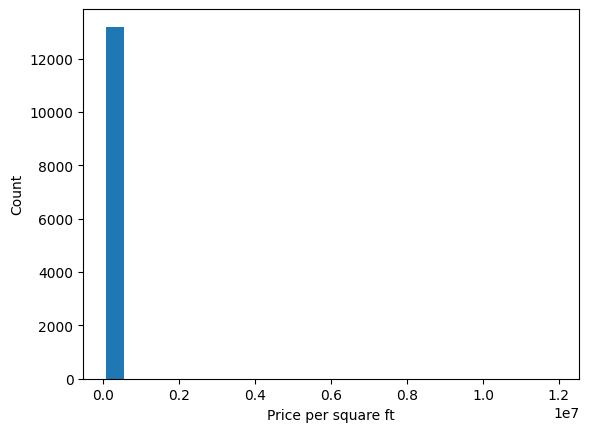

In [43]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

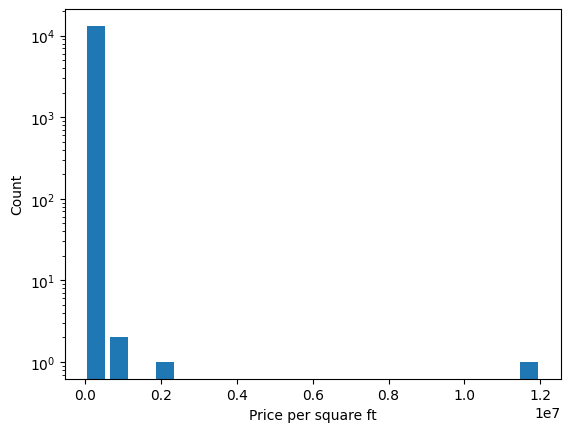

In [44]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

In [45]:
lower_limit=df['price_per_sqft'].quantile(0.001)

In [46]:
upper_limit=df['price_per_sqft'].quantile(0.999)

In [50]:
df[(df['price_per_sqft']<upper_limit) &(df['price_per_sqft']>lower_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [51]:
df2=df[(df['price_per_sqft']<upper_limit) &(df['price_per_sqft']>lower_limit)]

In [52]:
df2.shape

(13172, 7)

In [53]:
df.shape

(13200, 7)

In [54]:
df.shape[0]-df2.shape[0]

28

In [55]:
max_limit=df2.price_per_sqft.mean()+4*df2.price_per_sqft.std()
min_limit=df2.price_per_sqft.mean()-4*df2.price_per_sqft.std()

In [56]:
max_limit

23227.73653589432

In [57]:
min_limit

-9900.429065502582

In [58]:
df3=df2[(df2['price_per_sqft']<max_limit) &(df2['price_per_sqft']>min_limit)]

In [59]:
df3.shape

(13047, 7)

In [60]:
df2.shape[0]-df3.shape[0]

125

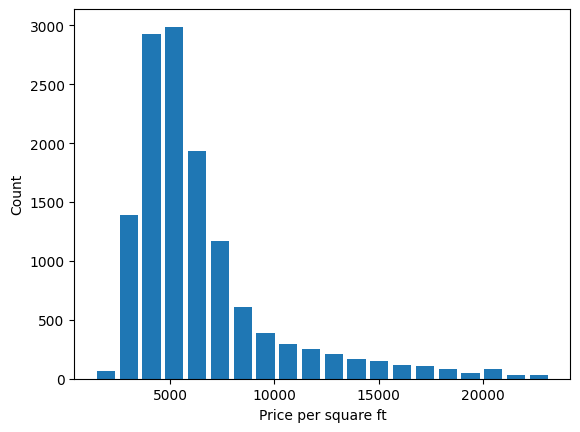

In [61]:
plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

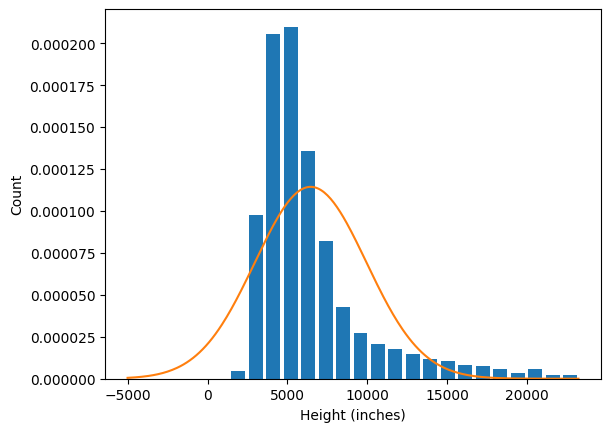

In [62]:
from scipy.stats import norm
import numpy as np

plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, df3.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,df3.price_per_sqft.mean(),df3.price_per_sqft.std()))

In [63]:
df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()
df2.sample(10)

<ipython-input-63-70754eb1335e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
10117,Akshaya Nagar,2 BHK,1225.0,2.0,68.00,2,5551,-0.268691
4162,Hennur Road,2 BHK,1182.0,2.0,82.50,2,6979,0.076152
10443,Kadubeesanahalli,2 BHK,1185.0,2.0,55.00,2,4641,-0.488443
6571,Bannerghatta Road,3 BHK,1625.0,2.0,75.00,3,4615,-0.494722
13165,other,2 BHK,1353.0,2.0,110.00,2,8130,0.354103
11586,Neeladri Nagar,2 BHK,1105.0,2.0,30.00,2,2714,-0.953787
10754,Narayanapura,2 BHK,1469.0,2.0,99.14,2,6748,0.020368
10994,Yelahanka,6 Bedroom,1200.0,5.0,150.00,6,12500,1.409398
7750,Whitefield,2 BHK,1295.0,2.0,78.50,2,6061,-0.145533
7380,Ramamurthy Nagar,5 Bedroom,1350.0,5.0,120.00,5,8888,0.537149


In [64]:
df4 = df2[(df2.zscore>-4)&(df2.zscore<4)]
df4.shape

(13047, 8)

In [65]:
df2.shape[0] - df4.shape[0]

125

In [66]:
#same as df2-df3